In [6]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import itertools

%matplotlib inline

In [4]:
dataset = pd.read_csv('./data/agaricus-lepiota.csv').astype('category')
dataset = dataset.replace({'?' : np.nan})

In [4]:
nrow, ncol = dataset.shape
nrow, ncol

(8124, 23)

In [28]:
dataset.head(10)

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises?                  8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                5644 non-null   object  
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

In [30]:
dataset.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises?                       0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [31]:
bool_series = pd.isnull(dataset["stalk-root"])
dataset[bool_series]

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3984,e,x,y,b,t,n,f,c,b,e,...,s,e,w,p,w,t,e,w,c,w
4023,p,x,y,e,f,y,f,c,n,b,...,s,w,w,p,w,o,e,w,v,p
4076,e,f,y,u,f,n,f,c,n,h,...,f,w,w,p,w,o,f,h,y,d
4100,p,x,y,e,f,y,f,c,n,b,...,s,p,p,p,w,o,e,w,v,d
4104,p,x,y,n,f,f,f,c,n,b,...,s,p,p,p,w,o,e,w,v,l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [32]:
dataset['stalk-root'].isnull().sum()/ nrow

0.3052683407188577

In [33]:
set(dataset['veil-type'])

{'p'}

In [34]:
f_dataset = dataset.apply(lambda x: pd.factorize(x)[0]).astype('category')
f_dataset = df1 = f_dataset.drop(['stalk-root', 'veil-type'], axis=1)
f_dataset.head(10)

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1
5,1,0,1,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,1,1
6,1,1,0,2,0,1,0,0,1,2,...,0,0,0,0,0,0,0,0,1,2
7,1,1,1,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,0,2
8,0,0,1,2,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,3,1
9,1,1,0,1,0,1,0,0,1,2,...,0,0,0,0,0,0,0,0,0,2


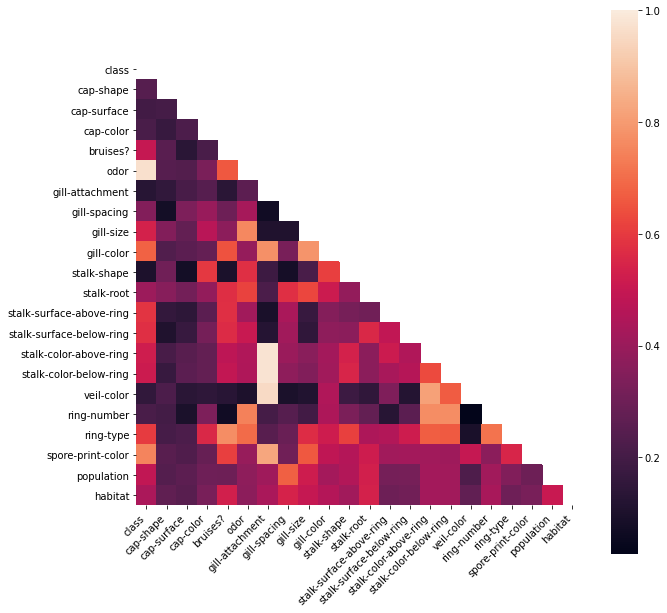

In [26]:
import seaborn as sns

dataset = pd.read_csv('./data/agaricus-lepiota.csv').astype('category').drop(['veil-type'],axis=1)

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

def get_corr(data):
    correlations =  np.array([cramers_v(data[x],data[y]) for (x,y) in itertools.product(data.columns,repeat=2)])
    corr = pd.DataFrame(
        correlations.reshape(len(data.columns),-1),
        columns=data.columns,
        index=data.columns
    )
    corr.style.background_gradient(cmap='coolwarm').set_precision(0)
    return corr

def plot_corr(corr):
    mask = np.triu(np.ones_like(corr, dtype=np.bool))
    fig, ax = plt.subplots(figsize=(10,10))  
    sns.heatmap(
        corr,
        mask=mask,
        square=True,
        ax=ax
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    );

corr = get_corr(dataset)
plot_corr(corr)

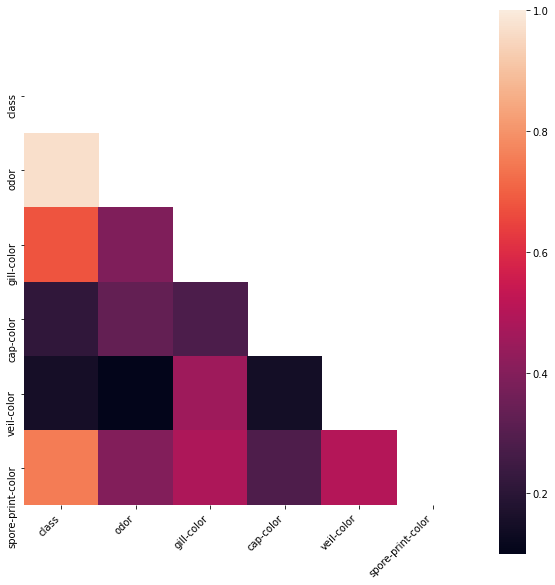

In [27]:
zcorr = get_corr(dataset.get(['class','odor','gill-color','cap-color','veil-color','spore-print-color']))
plot_corr(corr)

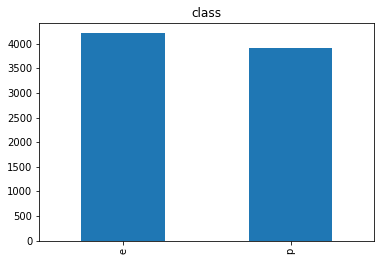

In [37]:
(off, siz) = (0, 1)
fig, ax = plt.subplots(1,1)
for i, col in enumerate(dataset.columns[off:off+siz]):
    dataset[col].value_counts().plot(kind='bar', ax=ax).set_title(col)

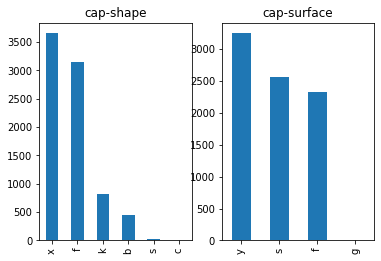

In [38]:
(off, siz) = (1, 2)
fig, ax = plt.subplots(1,2)
for i, col in enumerate(dataset.columns[off:off+siz]):
    dataset[col].value_counts().plot(kind='bar', ax=ax[i]).set_title(col)

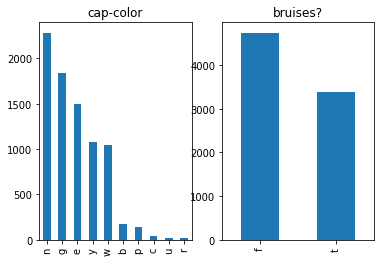

In [39]:
(off, siz) = (3, 2)
fig, ax = plt.subplots(1,2)
for i, col in enumerate(dataset.columns[off:off+siz]):
    dataset[col].value_counts().plot(kind='bar', ax=ax[i]).set_title(col)

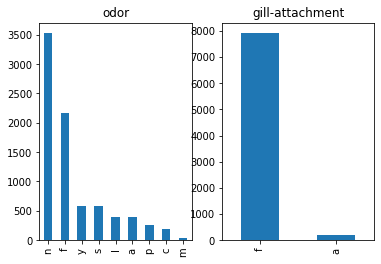

In [40]:
(off, siz) = (5, 2)
fig, ax = plt.subplots(1,2)
for i, col in enumerate(dataset.columns[off:off+siz]):
    dataset[col].value_counts().plot(kind='bar', ax=ax[i]).set_title(col)

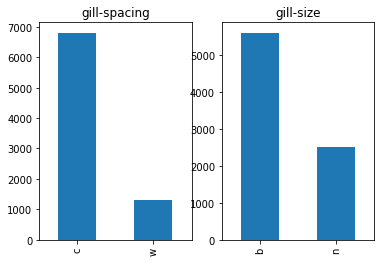

In [41]:
(off, siz) = (7, 2)
fig, ax = plt.subplots(1,2)
for i, col in enumerate(dataset.columns[off:off+siz]):
    dataset[col].value_counts().plot(kind='bar', ax=ax[i]).set_title(col)

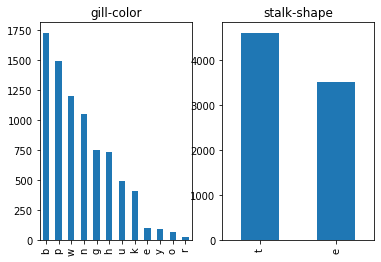

In [42]:
(off, siz) = (9, 2)
fig, ax = plt.subplots(1,2)
for i, col in enumerate(dataset.columns[off:off+siz]):
    dataset[col].value_counts().plot(kind='bar', ax=ax[i]).set_title(col)

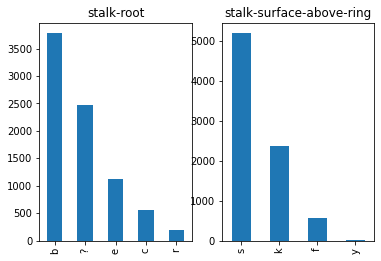

In [43]:
(off, siz) = (11, 2)
fig, ax = plt.subplots(1,2)
for i, col in enumerate(dataset.columns[off:off+siz]):
    dataset[col].value_counts().plot(kind='bar', ax=ax[i]).set_title(col)

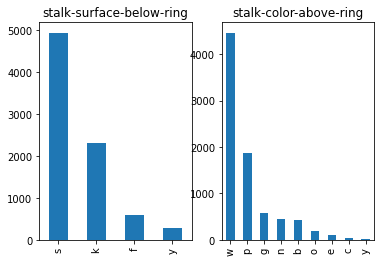

In [44]:
(off, siz) = (13, 2)
fig, ax = plt.subplots(1,2)
for i, col in enumerate(dataset.columns[off:off+siz]):
    dataset[col].value_counts().plot(kind='bar', ax=ax[i]).set_title(col)

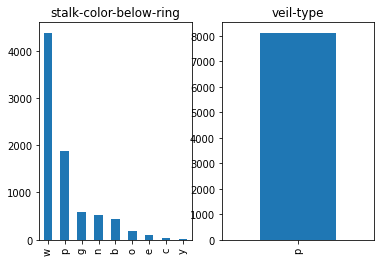

In [45]:
(off, siz) = (15, 2)
fig, ax = plt.subplots(1,2)
for i, col in enumerate(dataset.columns[off:off+siz]):
    dataset[col].value_counts().plot(kind='bar', ax=ax[i]).set_title(col)

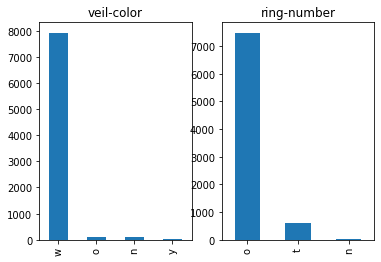

In [46]:
(off, siz) = (17, 2)
fig, ax = plt.subplots(1,2)
for i, col in enumerate(dataset.columns[off:off+siz]):
    dataset[col].value_counts().plot(kind='bar', ax=ax[i]).set_title(col)

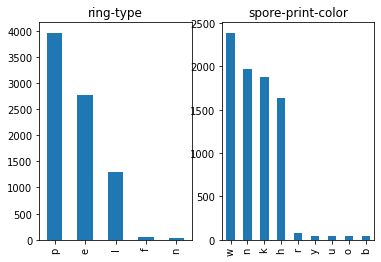

In [47]:
(off, siz) = (19, 2)
fig, ax = plt.subplots(1,2)
for i, col in enumerate(dataset.columns[off:off+siz]):
    dataset[col].value_counts().plot(kind='bar', ax=ax[i]).set_title(col)

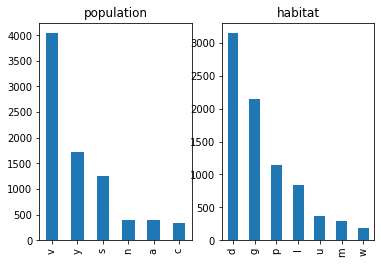

In [48]:
(off, siz) = (21, 2)
fig, ax = plt.subplots(1,2)
for i, col in enumerate(dataset.columns[off:off+siz]):
    dataset[col].value_counts().plot(kind='bar', ax=ax[i]).set_title(col)

